Structures de bandes électroniques du CaI2 :


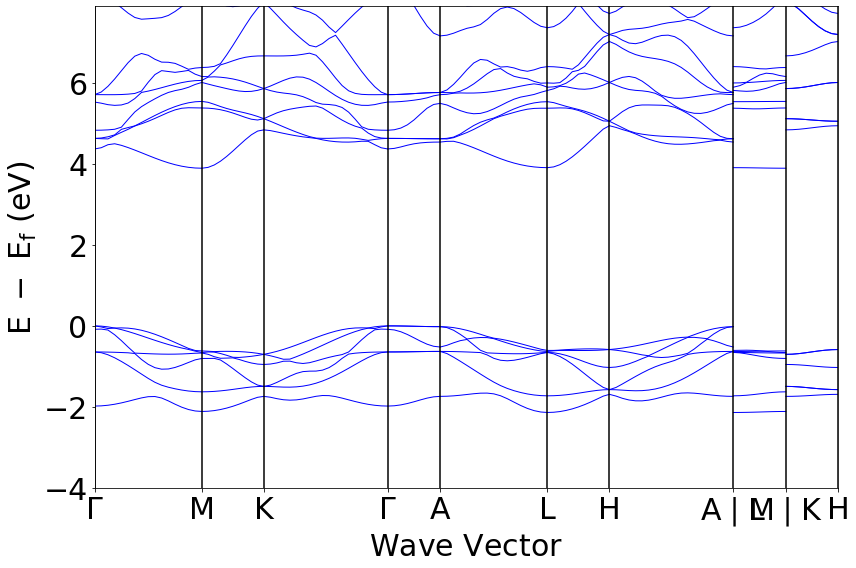

CALCUL DE LA BANDE INTERDITE  
Bande indirecte
Largeur de la bande interdite = 3.8971 [eV]
Vecteur de transition : \Gamma-M


In [38]:
from pymatgen import MPRester, Lattice
from pymatgen.io.cif import CifWriter
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter

with MPRester("B6FsiVusbpLKdMu3") as m: 
    structure = m.get_structure_by_material_id("mp-30031")
    w = CifWriter(structure)
    w.write_file('mp30031.cif')
    bs = m.get_bandstructure_by_material_id("mp-30031")


bs_plotter = BSPlotter(bs)
data = bs_plotter.bs_plot_data()
bg = bs.get_band_gap() # récupère les informations sur la bande interdite
print("Structures de bandes électroniques du CaI2 :")
bs_plotter.show()
print("CALCUL DE LA BANDE INTERDITE  ")
#print("Bande directe ? ", bg['direct'])
print("Bande indirecte")
print("Largeur de la bande interdite =", bg['energy'], "[eV]")
print("Vecteur de transition :", bg['transition'])

In [12]:
print("DISPERSION ")
print("Il s'agit dans un premier temps de trouver le maximum de la bande de valence et le minimum de la bande de conduction, on trouve cela au moyen des commandes cbm et vbm.")
#conduction band minimum = CBM
#valence band maximum = VBM
print(" ")
cbm = bs.get_cbm()
vbm = bs.get_vbm()
print(cbm)
print(vbm)
print(" ")
print("La bande de valence maximale est donc la 11eme et la bande de conduction minimale est donc la 12eme.")

DISPERSION 
Il s'agit dans un premier temps de trouver le maximum de la bande de valence et le minimum de la bande de conduction, on trouve cela au moyen des commandes cbm et vbm.
 
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}), 'kpoint_index': [16, 17, 113], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f200ca0bb00>, 'energy': 3.8754, 'projections': {}}
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11]}), 'kpoint_index': [0, 47, 48], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f200ca28668>, 'energy': -0.0217, 'projections': {}}
 
La bande de valence max est donc la 11eme et la bande de conduction min est donc la 12eme.


 Pour cette partie, il nous est demandé de trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.
 Nous allons donc calculer la valeur des pentes pour les différentes bandes et ainsi déterminer les max et min de dispersion.
 Les maximums sont représentés par des flèches rouges et les minimums par des flèches vertes.
 La bande interdite est représentée en rouge pâle.
 
CALCUL DES PENTES POUR LA BANDE DE VALENCE
 
Si l'on sélectionne les pentes maximales et minimales en valeure absolue, on obtient respectivement 0.03257019151833062  pour le minimum ce qui correspond à la 8ème branche et  0.7761080161358492  pour le maximum, ce qui correspond à la 1ère branche. 
 
CALCUL DES PENTES POUR LA BANDE DE CONDUCTION
 
Si l'on sélectionne les pentes maximales et minimales en valeure absolue, on obtient respectivement 0.0356476899295114  pour le minimum ce qui correspond à la 8ème branche et  2.249690783672818  pour le

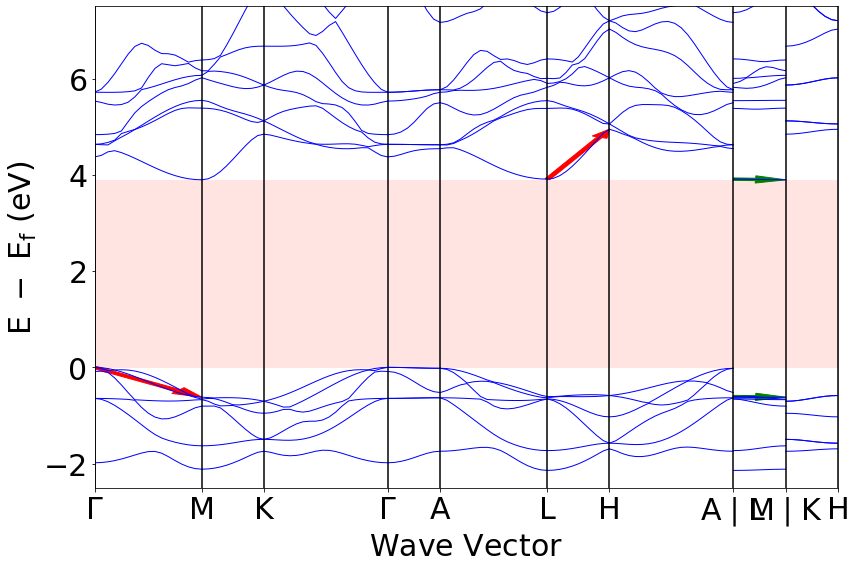

In [37]:
print(" Pour cette partie, il nous est demandé de trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.")
print(" Nous allons donc calculer la valeur des pentes pour les différentes bandes et ainsi déterminer les max et min de dispersion.")
print(" Les maximums sont représentés par des flèches rouges et les minimums par des flèches vertes.")
print(" La bande interdite est représentée en rouge pâle.")
print(" ")

print("CALCUL DES PENTES POUR LA BANDE DE VALENCE")
print(" ")
energy0v = np.zeros(9)
energyfv = np.zeros(9)
penteV = np.zeros(9)
distance = data.get('ticks').get('distance')
distancenew = distance
for i in range(1, 8) :
    if distancenew[i] == distancenew[i-1] :
        del distancenew[i]
     
for i in range(0, 9) : 
    energy0v[i] = (data.get('energy')[i].get('1')[11])[0]
    energyfv[i] = (data.get('energy')[i].get('1')[11])[-1]
    penteV[i] = (energyfv[i] - energy0v[i])/(distancenew[i+1]-distancenew[i])

print("Si l'on sélectionne les pentes maximales et minimales en valeure absolue, on obtient respectivement", min(abs(penteV))," pour le minimum ce qui correspond à la 8ème branche et ", max(abs(penteV))," pour le maximum, ce qui correspond à la 1ère branche. ") 
print(" ")
print("CALCUL DES PENTES POUR LA BANDE DE CONDUCTION")
print(" ")
#calcul des pentes pour la bande de conduction
energy0c = np.zeros(9)
energyfc = np.zeros(9)
penteC = np.zeros(9)
for i in range(0,9) :
    energy0c[i] = (data.get('energy')[i].get('1')[12])[0]
    energyfc[i] = (data.get('energy')[i].get('1')[12])[-1]
    penteC[i] = (energyfc[i]-energy0c[i])/(distancenew[i+1]-distancenew[i])

print("Si l'on sélectionne les pentes maximales et minimales en valeure absolue, on obtient respectivement", min(abs(penteC))," pour le minimum ce qui correspond à la 8ème branche et ", max(abs(penteC))," pour le maximum, ce qui correspond à la 6ème branche. ")    
print (" ")
bs_plotter.get_plot(ylim = [-2.5, 7.5])
plt.arrow(distance[7], energy0c[7], distance[8]-distance[7], energyfc[7]-energy0c[7], color ='green', width = 0.05, length_includes_head = True)
plt.arrow(distance[5], energy0c[5], distance[6]-distance[5], energyfc[5]-energy0c[5], color = 'r', width = 0.04, length_includes_head = True)
plt.arrow(distance[7], energy0v[7], distance[8]-distance[7], energyfv[7]-energy0v[7], color = 'green', width = 0.05, length_includes_head = True)
plt.arrow(distance[0], energy0v[0], distance[1]-distance[0], energyfv[0]-energy0v[0], color = 'r', width = 0.05, length_includes_head = True)
plt.fill_between(np.linspace(data['ticks']['distance'][0], data['ticks']['distance'][-1], 500), 0, bg['energy'], color = 'mistyrose')




In [ ]:
print(" A présent, il nous est demandé de calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.")
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)
dist = data.get('distances')
print(" ")
print("       MASSE EFFECTIVE DANS LA BANDE DE CONDUCTION   ")
print(" ")


print(" ")
print("       MASSE EFFECTIVE DANS LA BANDE DE VALENCE     ")
print(" ")